In [15]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os

In [16]:
# Load the paediatric data :AIOLOS19-12-2023
import pandas as pd
import numpy as np

# Load the data in xlsx file 
df = pd.read_csv('../data/04_feature/table_I_historical_smooth.csv')

df

,WEEK_LABEL,DIAGNOSIS_CATEGORY,AGE_CLASS,RSS_DURATION_CLASS,N_CASES,SMOOTHED_N_CASES,LOWER_CI_SMOOTHED_N_CASES,UPPER_CI_SMOOTHED_N_CASES,BASELINE_N_CASES,LOWER_CI_BASELINE_N_CASES,UPPER_CI_BASELINE_N_CASES,ALERT_N_CASES
0,2022-01-03,RI_OTHER_VIRUS,Less than 1 year,[2 - 5[ days,1,0.400237,0.000000,1.231070,0.400237,0.000000,1.231070,0
1,2022-01-10,RI_OTHER_VIRUS,Less than 1 year,[2 - 5[ days,0,0.599763,0.000000,1.571794,0.599763,0.000000,1.571794,0
2,2022-01-17,RI_OTHER_VIRUS,Less than 1 year,[2 - 5[ days,1,0.606305,0.000000,1.630939,0.606305,0.000000,1.630939,0
3,2022-01-24,RI_OTHER_VIRUS,Less than 1 year,[2 - 5[ days,1,0.418678,0.000000,1.423199,0.418678,0.000000,1.423199,0
4,2022-01-31,RI_OTHER_VIRUS,Less than 1 year,[2 - 5[ days,0,0.393695,0.000000,1.331289,0.393695,0.000000,1.331289,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9625,2023-12-18,IR GENERALE,65 years and older,5 days and more,110,107.988207,73.781459,142.194954,159.808161,114.288120,205.328203,0
9626,2023-12-25,IR GENERALE,65 years and older,5 days and more,99,81.191507,57.135222,105.247793,145.949846,101.990136,189.909557,0
9627,2024-01-01,IR GENERALE,65 years and older,5 days and more,38,54.064525,29.275643,78.853408,130.652863,85.649818,175.655907,0
9628,2024-01-08,IR GENERALE,65 years and older,5 days and more,24,31.508304,7.128684,55.887924,121.530695,82.893043,160.168347,0


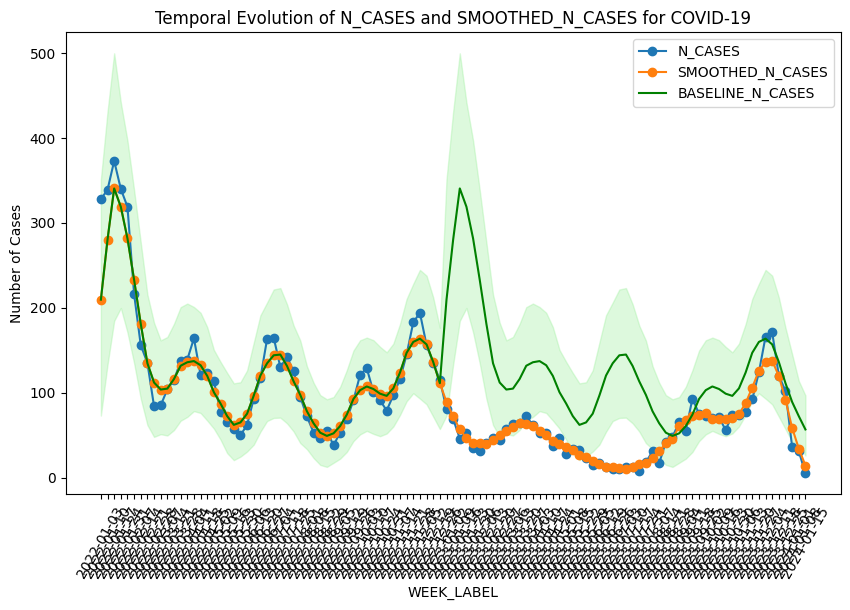

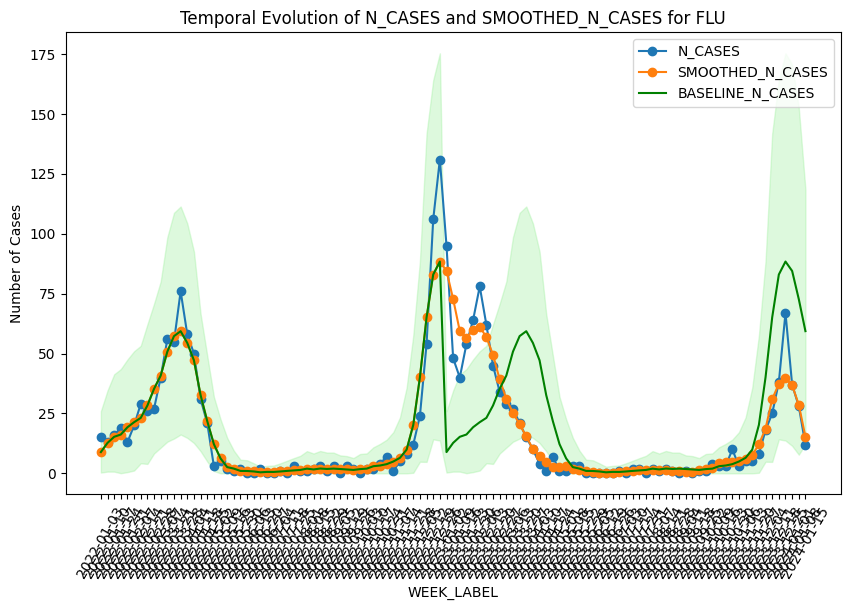

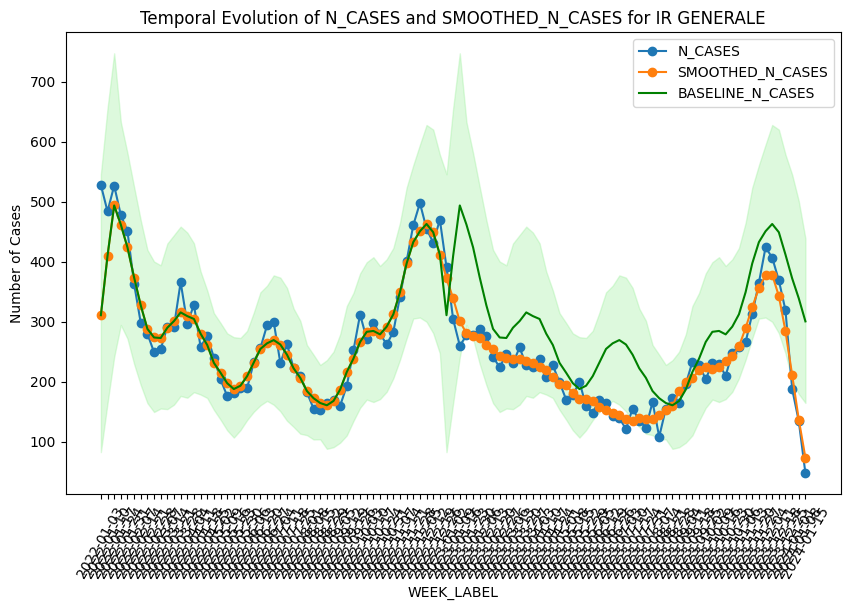

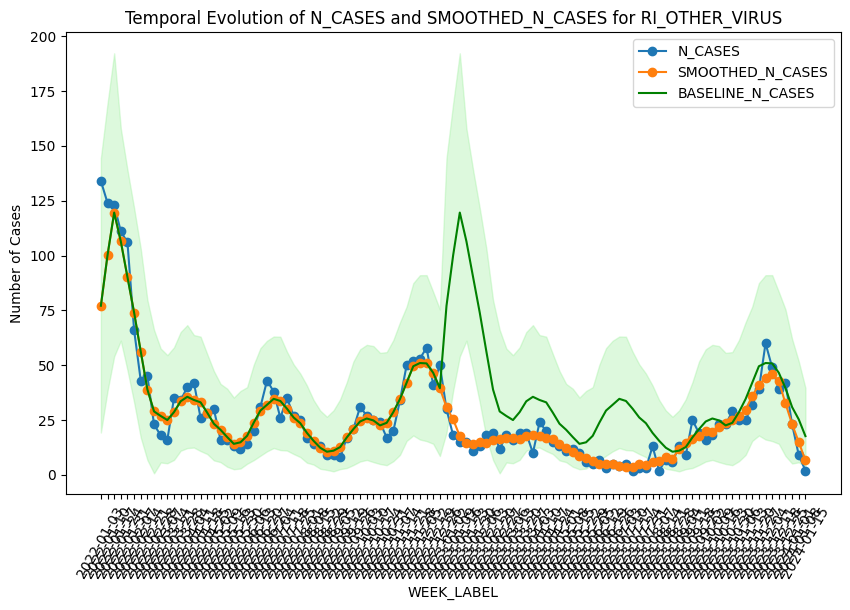

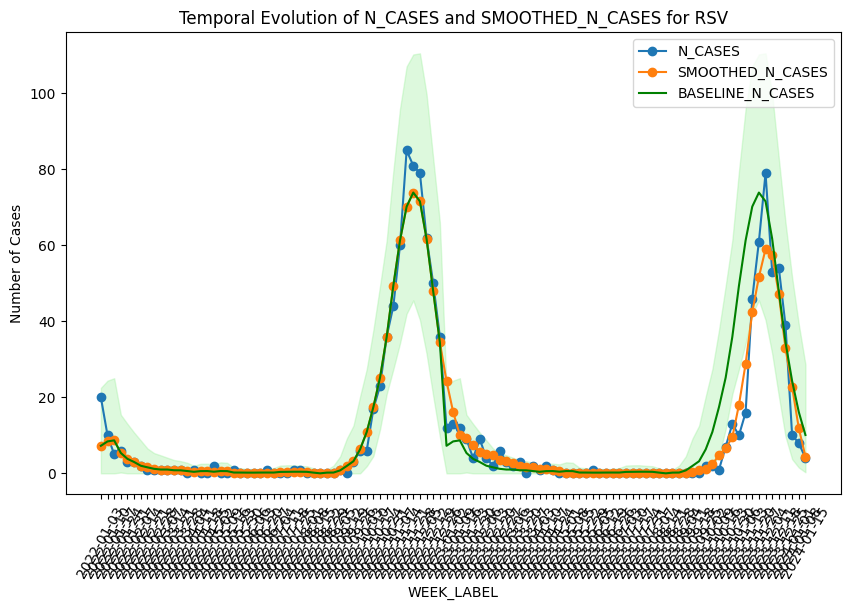

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = ...

# Step 1: Calculate the sum by DIAGNOSIS_CATEGORY and WEEK_LABEL
df_sum = df.groupby(['DIAGNOSIS_CATEGORY', 'WEEK_LABEL']).agg({
    'N_CASES': 'sum',
    'SMOOTHED_N_CASES': 'sum',
    'BASELINE_N_CASES': 'sum',  # Assuming BASELINE_N_CASES is a mean value
    'LOWER_CI_BASELINE_N_CASES': 'sum',  # Assuming LOWER_CI_BASELINE_N_CASES is a mean value
    'UPPER_CI_BASELINE_N_CASES': 'sum'  # Assuming UPPER_CI_BASELINE_N_CASES is a mean value
}).reset_index()

# Step 2: Create plots for each DIAGNOSIS_CATEGORY
diagnosis_categories = df_sum['DIAGNOSIS_CATEGORY'].unique()

for category in diagnosis_categories:
    # Filter the DataFrame for the specific DIAGNOSIS_CATEGORY
    df_category = df_sum[df_sum['DIAGNOSIS_CATEGORY'] == category]

    # Create a plot for N_CASES and SMOOTHED_N_CASES
    plt.figure(figsize=(10, 6))
    plt.plot(df_category['WEEK_LABEL'], df_category['N_CASES'], label='N_CASES', marker='o')
    plt.plot(df_category['WEEK_LABEL'], df_category['SMOOTHED_N_CASES'], label='SMOOTHED_N_CASES', marker='o')

    # Plot BASELINE_N_CASES
    plt.plot(df_category['WEEK_LABEL'], df_category['BASELINE_N_CASES'], label='BASELINE_N_CASES', color='green')

    # Fill between LOWER_CI_BASELINE_N_CASES and UPPER_CI_BASELINE_N_CASES
    plt.fill_between(df_category['WEEK_LABEL'],
                     df_category['LOWER_CI_BASELINE_N_CASES'],
                     df_category['UPPER_CI_BASELINE_N_CASES'],
                     color='lightgreen', alpha=0.3)

    # Add labels and title to the plot
    plt.xlabel('WEEK_LABEL')
    plt.ylabel('Number of Cases')
    plt.title(f'Temporal Evolution of N_CASES and SMOOTHED_N_CASES for {category}')

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=60)

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()


In [24]:
# Load the paediatric data :AIOLOS19-12-2023
import pandas as pd
import numpy as np

# Load the data in xlsx file 
df = pd.read_csv('../data/04_feature/table_II_historical_smooth.csv')

df

,WEEK_LABEL,DIAGNOSIS_CATEGORY,N_DEATH,N_CASES,SMOOTHED_N_CASES,LOWER_CI_SMOOTHED_N_CASES,UPPER_CI_SMOOTHED_N_CASES,SMOOTHED_N_DEATH,LOWER_CI_SMOOTHED_N_DEATH,UPPER_CI_SMOOTHED_N_DEATH,BASELINE_N_CASES,LOWER_CI_BASELINE_N_CASES,UPPER_CI_BASELINE_N_CASES,BASELINE_N_DEATH,LOWER_CI_BASELINE_N_DEATH,UPPER_CI_BASELINE_N_DEATH,ALERT_N_CASES,ALERT_N_DEATH
0,2022-01-03,COVID-19,35.0,328.0,170.398154,0.000000,350.596515,17.062691,0.000000,36.759994,170.398154,0.000000,350.596515,17.062691,0.000000,36.759994,0,0
1,2022-01-10,COVID-19,34.0,339.0,204.727591,17.036662,392.418520,20.553414,0.082168,41.024660,204.727591,17.036662,392.418520,20.553414,0.082168,41.024660,0,0
2,2022-01-17,COVID-19,37.0,373.0,230.010869,38.172761,421.848976,23.028647,2.273651,43.783643,230.010869,38.172761,421.848976,23.028647,2.273651,43.783643,0,0
3,2022-01-24,COVID-19,39.0,340.0,245.753765,54.966114,436.541416,24.221270,3.496981,44.945558,245.753765,54.966114,436.541416,24.221270,3.496981,44.945558,0,0
4,2022-01-31,COVID-19,22.0,319.0,248.792802,61.278584,436.307019,24.205499,3.953985,44.457013,248.792802,61.278584,436.307019,24.205499,3.953985,44.457013,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2023-12-18,RSV,0.0,54.0,40.657885,4.928173,76.387597,0.478357,0.000000,1.772847,50.491869,19.311282,81.672457,0.777201,0.000000,2.810378,0,0
531,2023-12-25,RSV,1.0,39.0,36.783376,2.561092,71.005660,0.450699,0.000000,1.689992,43.350080,13.547957,73.152203,0.812406,0.000000,2.822588,0,0
532,2024-01-01,RSV,0.0,10.0,30.248747,0.000000,62.392355,0.401355,0.000000,1.554724,34.391173,8.781590,60.000756,0.735383,0.000000,2.597301,0,0
533,2024-01-08,RSV,0.0,8.0,22.785598,0.000000,51.348483,0.337914,0.000000,1.376371,26.493237,3.775624,49.210851,0.712942,0.000000,2.489103,0,0


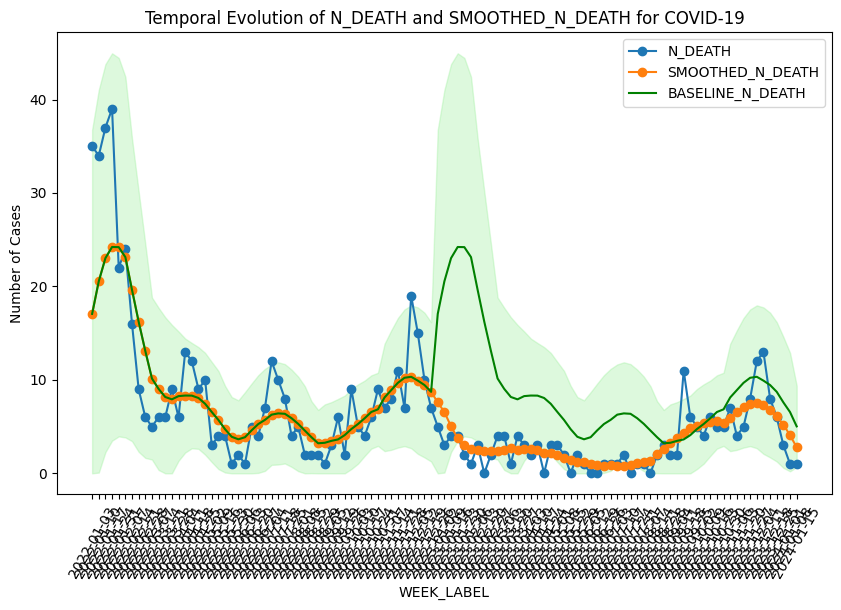

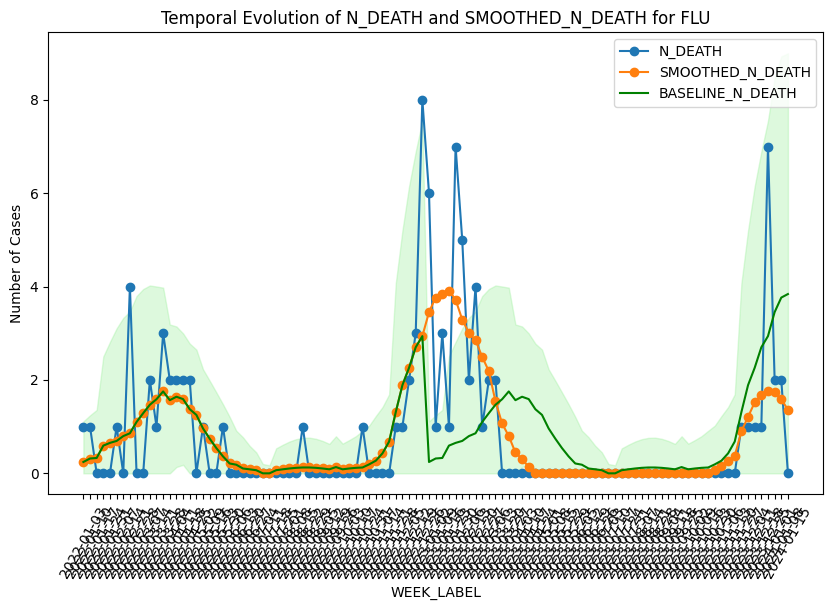

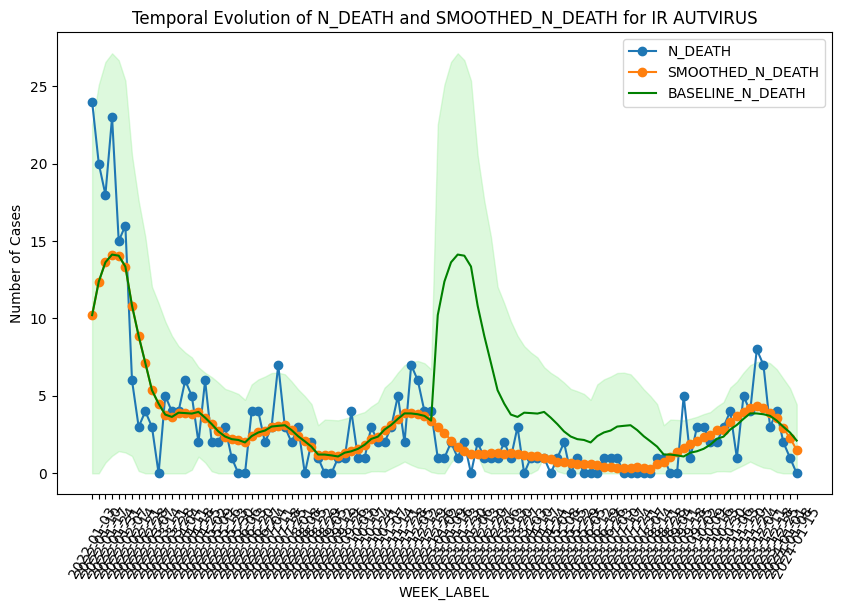

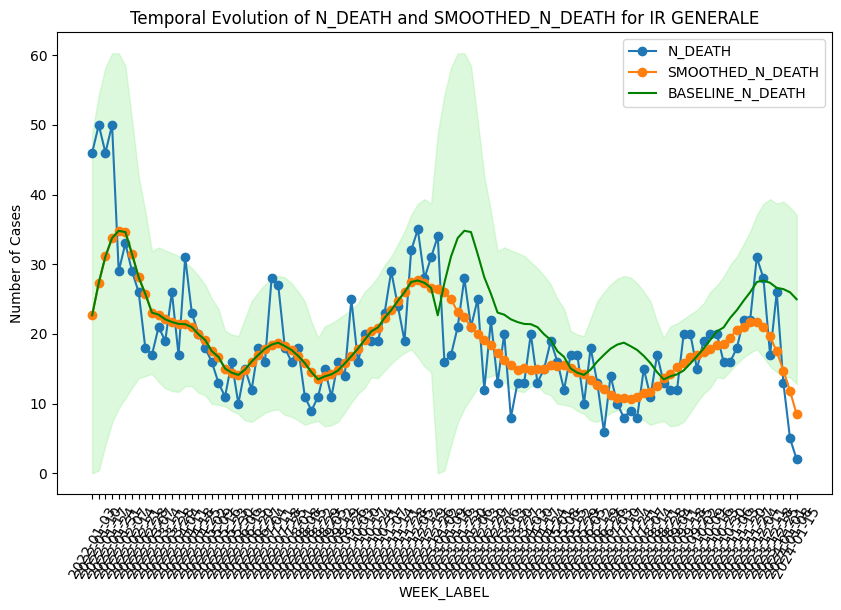

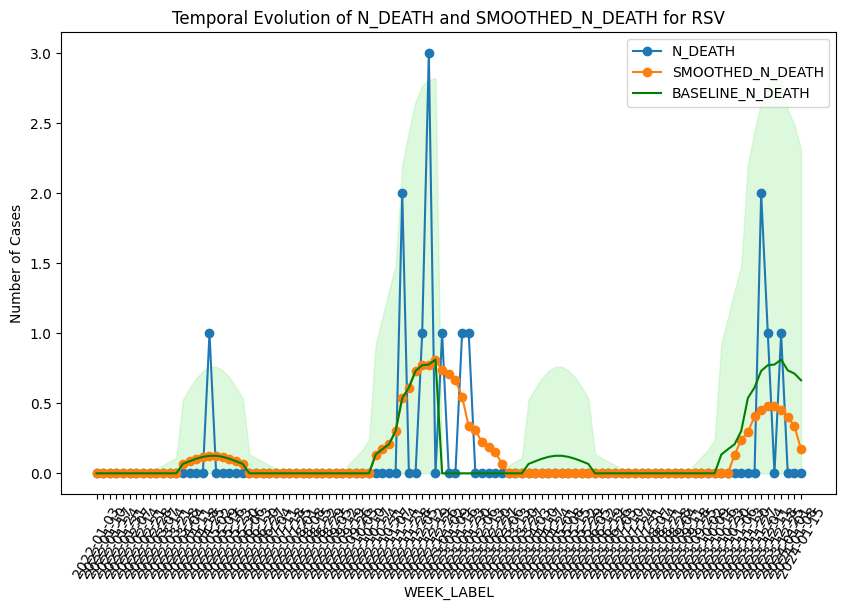

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = ...

# Step 1: Calculate the sum by DIAGNOSIS_CATEGORY and WEEK_LABEL
df_sum = df.groupby(['DIAGNOSIS_CATEGORY', 'WEEK_LABEL']).agg({
    'N_CASES': 'sum',
    'SMOOTHED_N_CASES': 'sum',
    'BASELINE_N_CASES': 'sum',  # Assuming BASELINE_N_CASES is a mean value
    'LOWER_CI_BASELINE_N_CASES': 'sum',  # Assuming LOWER_CI_BASELINE_N_CASES is a mean value
    'UPPER_CI_BASELINE_N_CASES': 'sum'  # Assuming UPPER_CI_BASELINE_N_CASES is a mean value
}).reset_index()

# Step 2: Create plots for each DIAGNOSIS_CATEGORY
diagnosis_categories = df_sum['DIAGNOSIS_CATEGORY'].unique()

for category in diagnosis_categories:
    # Filter the DataFrame for the specific DIAGNOSIS_CATEGORY
    df_category = df_sum[df_sum['DIAGNOSIS_CATEGORY'] == category]

    # Create a plot for N_CASES and SMOOTHED_N_CASES
    plt.figure(figsize=(10, 6))
    plt.plot(df_category['WEEK_LABEL'], df_category['N_CASES'], label='N_CASES', marker='o')
    plt.plot(df_category['WEEK_LABEL'], df_category['SMOOTHED_N_CASES'], label='SMOOTHED_N_CASES', marker='o')

    # Plot BASELINE_N_CASES
    plt.plot(df_category['WEEK_LABEL'], df_category['BASELINE_N_CASES'], label='BASELINE_N_CASES', color='green')

    # Fill between LOWER_CI_BASELINE_N_CASES and UPPER_CI_BASELINE_N_CASES
    plt.fill_between(df_category['WEEK_LABEL'],
                     df_category['LOWER_CI_BASELINE_N_CASES'],
                     df_category['UPPER_CI_BASELINE_N_CASES'],
                     color='lightgreen', alpha=0.3)

    # Add labels and title to the plot
    plt.xlabel('WEEK_LABEL')
    plt.ylabel('Number of Cases')
    plt.title(f'Temporal Evolution of N_CASES and SMOOTHED_N_CASES for {category}')

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=60)

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()


In [32]:
# Load the paediatric data :AIOLOS19-12-2023
import pandas as pd
import numpy as np

# Load the data in xlsx file 
df = pd.read_csv('../data/04_feature/table_III_historical_smooth.csv')

df

,WEEK_LABEL,DIAGNOSIS_CATEGORY,N_CRITICAL,N_CASES,SMOOTHED_N_CASES,LOWER_CI_SMOOTHED_N_CASES,UPPER_CI_SMOOTHED_N_CASES,SMOOTHED_N_CRITICAL,LOWER_CI_SMOOTHED_N_CRITICAL,UPPER_CI_SMOOTHED_N_CRITICAL,BASELINE_N_CASES,LOWER_CI_BASELINE_N_CASES,UPPER_CI_BASELINE_N_CASES,BASELINE_N_CRITICAL,LOWER_CI_BASELINE_N_CRITICAL,UPPER_CI_BASELINE_N_CRITICAL,ALERT_N_CASES,ALERT_N_CRITICAL
0,2022-01-03,COVID-19,72.0,328.0,209.577918,87.366690,331.789146,42.282009,6.447970,78.116047,209.577918,87.366690,331.789146,42.282009,6.447970,78.116047,0,0
1,2022-01-10,COVID-19,79.0,339.0,280.321586,157.597235,403.045938,53.698427,17.627299,89.769554,280.321586,157.597235,403.045938,53.698427,17.627299,89.769554,0,0
2,2022-01-17,COVID-19,57.0,373.0,340.618347,217.963336,463.273357,65.812042,27.996200,103.627883,340.618347,217.963336,463.273357,65.812042,27.996200,103.627883,0,0
3,2022-01-24,COVID-19,55.0,340.0,319.019422,248.434402,389.604442,59.948853,32.179087,87.718618,319.019422,248.434402,389.604442,59.948853,32.179087,87.718618,0,0
4,2022-01-31,COVID-19,67.0,319.0,281.651053,227.568145,335.733962,50.181748,31.166936,69.196561,281.651053,227.568145,335.733962,50.181748,31.166936,69.196561,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2023-12-18,RSV,15.0,54.0,47.137994,25.086668,69.189320,13.668169,8.280447,19.055891,47.899219,35.501475,60.296964,19.593222,16.568840,22.617604,0,0
531,2023-12-25,RSV,12.0,39.0,32.925385,18.087979,47.762790,9.825455,5.889630,13.761281,34.502200,23.015034,45.989367,14.732068,12.005441,17.458694,0,0
532,2024-01-01,RSV,3.0,10.0,22.693671,8.309014,37.078329,6.337189,2.320887,10.353492,24.281535,12.506096,36.056975,9.599763,6.919407,12.280120,0,0
533,2024-01-08,RSV,2.0,8.0,11.903288,0.000000,24.814839,3.294949,0.000000,7.082668,16.152780,4.658336,27.647224,6.150745,3.567010,8.734481,0,0


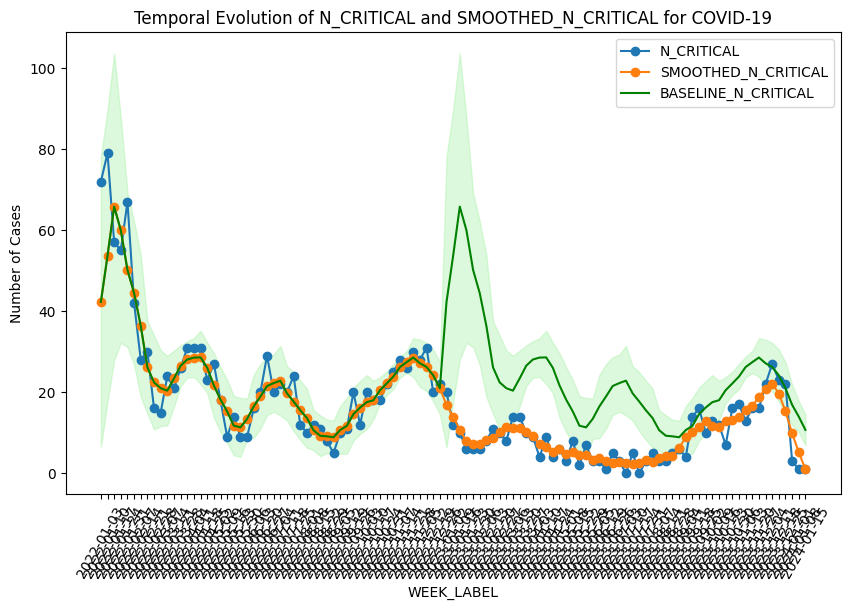

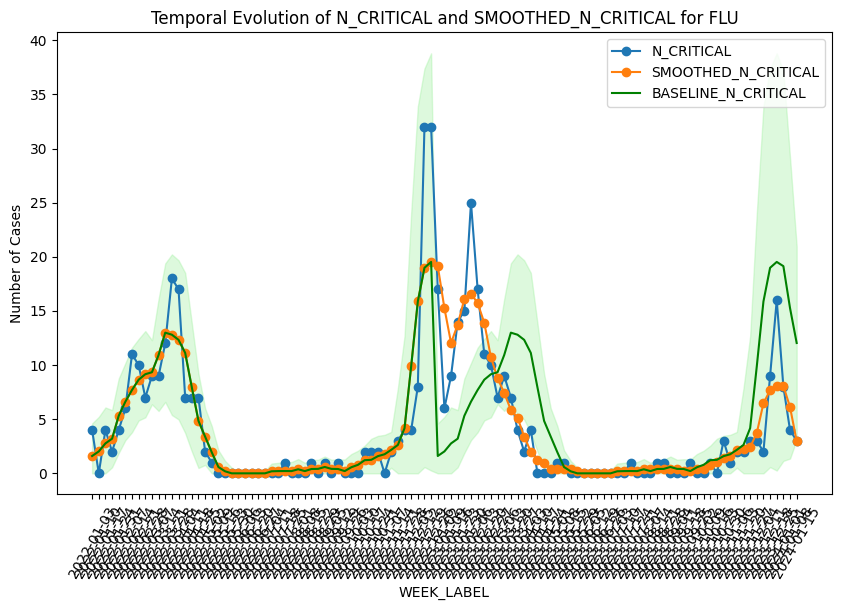

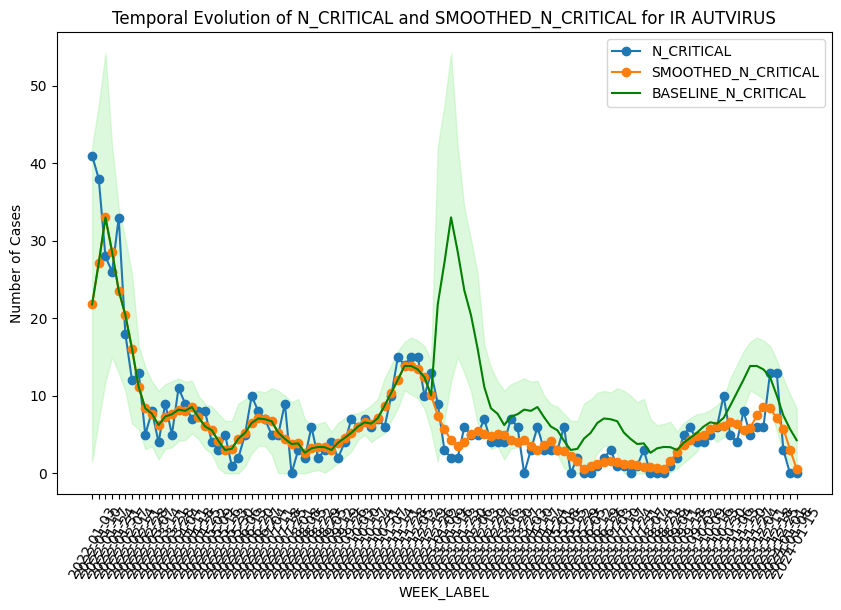

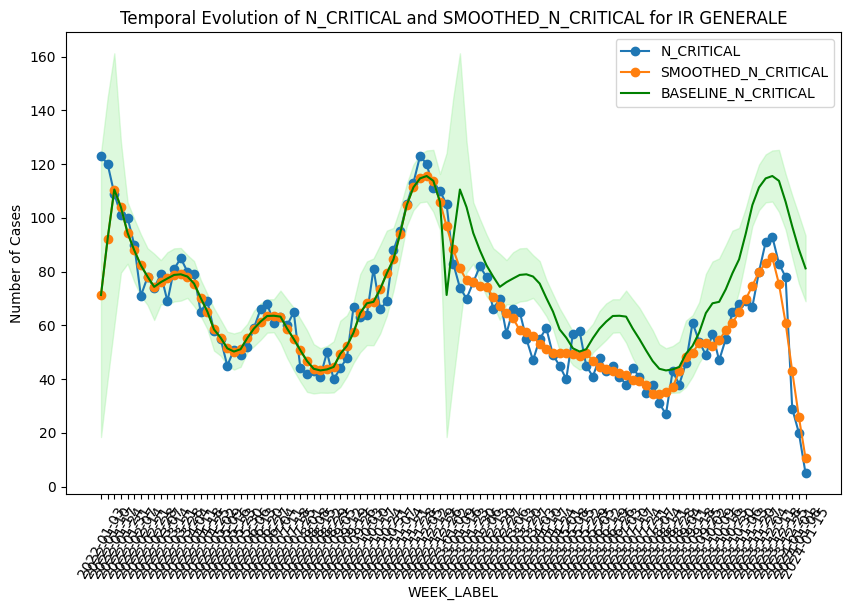

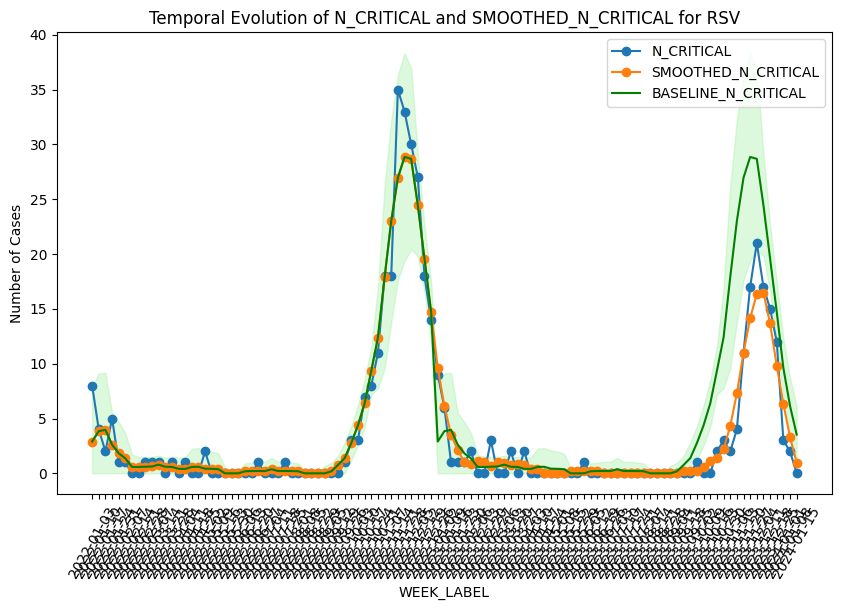

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = ...

# Step 1: Calculate the sum by DIAGNOSIS_CATEGORY and WEEK_LABEL
df_sum = df.groupby(['DIAGNOSIS_CATEGORY', 'WEEK_LABEL']).agg({
    'N_CASES': 'sum',
    'SMOOTHED_N_CASES': 'sum',
    'BASELINE_N_CASES': 'sum',  # Assuming BASELINE_N_CASES is a mean value
    'LOWER_CI_BASELINE_N_CASES': 'sum',  # Assuming LOWER_CI_BASELINE_N_CASES is a mean value
    'UPPER_CI_BASELINE_N_CASES': 'sum'  # Assuming UPPER_CI_BASELINE_N_CASES is a mean value
}).reset_index()

# Step 2: Create plots for each DIAGNOSIS_CATEGORY
diagnosis_categories = df_sum['DIAGNOSIS_CATEGORY'].unique()

for category in diagnosis_categories:
    # Filter the DataFrame for the specific DIAGNOSIS_CATEGORY
    df_category = df_sum[df_sum['DIAGNOSIS_CATEGORY'] == category]

    # Create a plot for N_CASES and SMOOTHED_N_CASES
    plt.figure(figsize=(10, 6))
    plt.plot(df_category['WEEK_LABEL'], df_category['N_CASES'], label='N_CASES', marker='o')
    plt.plot(df_category['WEEK_LABEL'], df_category['SMOOTHED_N_CASES'], label='SMOOTHED_N_CASES', marker='o')

    # Plot BASELINE_N_CASES
    plt.plot(df_category['WEEK_LABEL'], df_category['BASELINE_N_CASES'], label='BASELINE_N_CASES', color='green')

    # Fill between LOWER_CI_BASELINE_N_CASES and UPPER_CI_BASELINE_N_CASES
    plt.fill_between(df_category['WEEK_LABEL'],
                     df_category['LOWER_CI_BASELINE_N_CASES'],
                     df_category['UPPER_CI_BASELINE_N_CASES'],
                     color='lightgreen', alpha=0.3)

    # Add labels and title to the plot
    plt.xlabel('WEEK_LABEL')
    plt.ylabel('Number of Cases')
    plt.title(f'Temporal Evolution of N_CASES and SMOOTHED_N_CASES for {category}')

    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=60)

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()
